# Bag of words

The most intuitive way to do so is to use a bags of words representation:

1. Assign a fixed integer id to each word occurring in any document of the training set (for instance by building a dictionary from words to integer indices).
2. For each document `#i`, count the number of occurrences of each word `w` and store it in `X[i, j]` as the value of feature `#j` where `j` is the index of word `w` in the dictionary.

The bags of words representation implies that n_features is the number of distinct words in the corpus: this number is typically larger than 100,000.

If `n_samples == 10000`, storing `X` as a NumPy array of type float32 would require 10000 x 100000 x 4 bytes = **4GB in RAM** which is barely manageable on today’s computers.

Fortunately, **most values in X** will be zeros since for a given document less than a few thousand distinct words will be used. For this reason we say that bags of words are typically **high-dimensional sparse datasets**. We can save a lot of memory by only storing the non-zero parts of the feature vectors in memory.

## The Bag of Words representation

* **tokenizing** strings and giving an integer id for each possible token, for instance by using white-spaces and punctuation as token separators.
* **counting** the occurrences of tokens in each document.
* **normalizing** and weighting with diminishing importance tokens that occur in the majority of samples / documents.

## Notes 
In this project, we use [vncorenlp](https://github.com/vncorenlp/VnCoreNLP) to tokenize Vietnamese. For opening the **vncorenlp service**, please run the `lauch.sh` in vncorenlp folder.

In [1]:
import pandas as pd
from os import getcwd
from vncorenlp import VnCoreNLP


__BASE__ = getcwd() + '/'
__DATA__ = __BASE__ + 'data/'

pd.set_option('display.max_colwidth', None)
annotator = VnCoreNLP(address="http://127.0.0.1", port=9000) 

In [2]:
# Load data 
df = pd.read_csv(__DATA__ + 'clean_data.csv')
df.head()

Class  \
0     -1   
1     -1   
2     -1   
3     -1   
4     -1   

                                                                                                                                                                                                                                                                                                 Data  
0                                                                                                                                                                                     mình đã dùng anywhere thế hệ đầu quả là đầy thất vọng hiện tại đang vứt xó giá thì đắt ngốn pin như ăn gỏi nặng  
1                                             quan tâm nhất là độ trễ có cao không dùng thi thoảng nó cứ trễ bực mình đấy mới chỉ là dùng văn phòng chứ game thì chắc là ném đi từ lâu không biết con này có độ trễ không nhỉ dùng nhiều loại nhưng vẫn kết nhất con chuột sứ mitsumi gọn bấm nảy tốt  
2                                                                                                                                                                                                                       đang xài con cùi bắp 98k pin trâu mỗi tội đánh liên minh ức chế đập hết 2 con  
3                                                                                                                                        logitech chắc hàng phải tiền triệu trở lên dùng mới thích chứ em dùng con có 400k thấy được vài bữa là hư chuyển sang eblue dùng được hơn năm chưa thấy hỏng  
4  đang xài con m175 cùi mía nhà xài nhiều chuột nên thử con này con kia chơi và kết quả là sau 3 tháng và 4 con chuột khác nhau đủ kiểu đa chức năng mà h chỉ còn lại là con m175 cùi mía còn xài được 3 h đi mua chuột là xác định không để mấy con nhân viên vấy ngắn nó dụ nửa cứ logitech mà fan

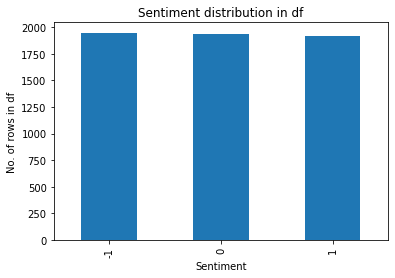

In [3]:
import matplotlib.pyplot as plt 
plt.figure()
pd.value_counts(df['Class']).plot.bar(title="Sentiment distribution in df")

plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [4]:
"""
Tokenization
"""
from string import punctuation

def tgn_tokenize(text):
    text = text.translate(str.maketrans('', '', punctuation))
    annotated_text = annotator.annotate(text)
    word_segmented_text = annotator.tokenize(text)
    return [w.lower() for w in word_segmented_text[0]]

df['tokenized_text'] = df.Data.apply(tgn_tokenize)
df.head()

Class  \
0     -1   
1     -1   
2     -1   
3     -1   
4     -1   

                                                                                                                                                                                                                                                                                                 Data  \
0                                                                                                                                                                                     mình đã dùng anywhere thế hệ đầu quả là đầy thất vọng hiện tại đang vứt xó giá thì đắt ngốn pin như ăn gỏi nặng   
1                                             quan tâm nhất là độ trễ có cao không dùng thi thoảng nó cứ trễ bực mình đấy mới chỉ là dùng văn phòng chứ game thì chắc là ném đi từ lâu không biết con này có độ trễ không nhỉ dùng nhiều loại nhưng vẫn kết nhất con chuột sứ mitsumi gọn bấm nảy tốt   
2                                                                                                                                                                                                                       đang xài con cùi bắp 98k pin trâu mỗi tội đánh liên minh ức chế đập hết 2 con   
3                                                                                                                                        logitech chắc hàng phải tiền triệu trở lên dùng mới thích chứ em dùng con có 400k thấy được vài bữa là hư chuyển sang eblue dùng được hơn năm chưa thấy hỏng   
4  đang xài con m175 cùi mía nhà xài nhiều chuột nên thử con này con kia chơi và kết quả là sau 3 tháng và 4 con chuột khác nhau đủ kiểu đa chức năng mà h chỉ còn lại là con m175 cùi mía còn xài được 3 h đi mua chuột là xác định không để mấy con nhân viên vấy ngắn nó dụ nửa cứ logitech mà fan   

                                                                                                                                                                                                                                                                                                                                                           tokenized_text  
0                                                                                                                                                                                                                                  [mình, đã, dùng, anywhere, thế_hệ, đầu, quả, là, đầy, thất_vọng, hiện_tại, đang, vứt, xó, giá, thì, đắt, ngốn, pin, như, ăn_gỏi, nặng]  
1                                                           [quan_tâm, nhất, là, độ, trễ, có, cao, không, dùng, thi_thoảng, nó, cứ, trễ, bực_mình, đấy, mới, chỉ, là, dùng, văn_phòng, chứ, game, thì, chắc, là, ném, đi, từ, lâu, không, biết, con, này, có, độ, trễ, không, nhỉ, dùng, nhiều, loại, nhưng, vẫn, kết, nhất, con, chuột, sứ, mitsumi, gọn, bấm, nảy, tốt]  
2                                                                                                                                                                                                                                                                          [đang, xài, con, cùi, bắp, 98k, pin, trâu, mỗi_tội, đánh, liên_minh, ức_chế, đập, hết, 2, con]  
3                                                                                                                                                                          [logitech, chắc, hàng, phải, tiền, triệu, trở, lên, dùng, mới, thích, chứ, em, dùng, con, có, 400k, thấy, được, vài, bữa, là, hư, chuyển, sang, eblue, dùng, được, hơn, năm, chưa, thấy, hỏng]  
4  [đang, xài, con, m175, cùi, mía, nhà, xài, nhiều, chuột, nên, thử, con, này, con, kia, chơi, và, kết_quả, là, sau, 3, tháng, và, 4, con, chuột, khác, nhau, đủ, kiểu, đa, chức_năng, mà, h, chỉ, còn, lại, là, con, m175, cùi, mía, còn, xài, được, 3, h, đi, mua, chuột, là, xác_định, không, để, mấy, con, nhân_viên, vấy, ngắn, n

In [12]:
"""
Building Dictionary
"""
from gensim import corpora
mydict = corpora.Dictionary(df['tokenized_text'])
print(f"Total unique words: {len(mydict.token2id)}")
print("\nSample data from dictionary:")
i = 0
for key in mydict.token2id.keys():
    print("Word: {} - ID: {} ".format(key, mydict.token2id[key]))
    if i == 10:
        break
    i += 1

Total unique words: 9526

Sample data from dictionary:
Word: anywhere - ID: 0 
Word: dùng - ID: 1 
Word: giá - ID: 2 
Word: hiện_tại - ID: 3 
Word: là - ID: 4 
Word: mình - ID: 5 
Word: ngốn - ID: 6 
Word: như - ID: 7 
Word: nặng - ID: 8 
Word: pin - ID: 9 
Word: quả - ID: 10 


In [21]:
"""
Example of how the BOW words
"""
import gensim
vocab_len = len(mydict)
arr = []
line = df.iloc[50]['tokenized_text']
print("Doc2Bow Line:")
print(mydict.doc2bow(line))
for word in line:
    arr.append(mydict.token2id[word])
print("\nActual line:")
print(line)
print("\n(Word, count) Tuples:")
print([(mydict[id], count) for id, count in mydict.doc2bow(line) ])
print("\nSparse bow vector for the line")
print(gensim.matutils.corpus2csc([mydict.doc2bow(line)],num_terms=vocab_len).toarray()[:,0])
print("\nSorted word id list")
print(sorted(arr))

Doc2Bow Line:
[(4, 1), (11, 2), (14, 3), (23, 1), (28, 1), (29, 1), (56, 1), (57, 1), (83, 1), (85, 1), (93, 1), (98, 2), (102, 1), (106, 1), (108, 1), (109, 1), (121, 2), (141, 1), (142, 1), (158, 1), (169, 1), (178, 1), (190, 1), (243, 2), (253, 1), (254, 1), (255, 1), (282, 1), (361, 1), (364, 1), (386, 1), (397, 1), (427, 1), (446, 3), (450, 1), (451, 2), (454, 2), (456, 1), (472, 1), (510, 1), (546, 1), (552, 1), (650, 1), (656, 2), (679, 1), (768, 1), (769, 1), (770, 2), (771, 1), (772, 1), (773, 1), (774, 1), (775, 1), (776, 1), (777, 1), (778, 1), (779, 1), (780, 1), (781, 1), (782, 1), (783, 1), (784, 1), (785, 1), (786, 2), (787, 1), (788, 2), (789, 1), (790, 1), (791, 1), (792, 1), (793, 1), (794, 2), (795, 1)]

Actual line:
['mua', 'đt', 'khác', 'lại', 'phải', 'nhét', 'túi', 'quần', 'à', 'nếu', 'gắn', 'sim', 'được', 'trên', 'đồng', 'hhồ', 'thì', 'chỉ', 'cần', 'giơ', 'tay', 'ra', 'xem', 'ai', 'gọi', 'tới', 'và', 'bấm', 'tai', 'nghe', 'blt', 'là', 'mghe', 'luôn', 'thôi', 'thi

In [7]:
"""
Using BOW
"""

from sklearn.model_selection import train_test_split

def split_train_test(top_data_df_small, test_size=0.3, shuffle_state=True):
    X_train, X_test, Y_train, Y_test = train_test_split(top_data_df_small[['tokenized_text']], 
                                                        top_data_df_small['Class'], 
                                                        shuffle=shuffle_state,
                                                        test_size=test_size, 
                                                        random_state=15)
    print("Value counts for Train sentiments")
    print(Y_train.value_counts())
    print("Value counts for Test sentiments")
    print(Y_test.value_counts())
    print(type(X_train))
    print(type(Y_train))
    X_train = X_train.reset_index()
    X_test = X_test.reset_index()
    Y_train = Y_train.to_frame()
    Y_train = Y_train.reset_index()
    Y_test = Y_test.to_frame()
    Y_test = Y_test.reset_index()
    print(X_train.head())
    return X_train, X_test, Y_train, Y_test

# Call the train_test_split
X_train, X_test, Y_train, Y_test = split_train_test(df)

Value counts for Train sentiments
 0    1372
-1    1350
 1    1340
Name: Class, dtype: int64
Value counts for Test sentiments
-1    599
 1    574
 0    568
Name: Class, dtype: int64
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
   index  \
0    523   
1   5474   
2   2827   
3   1792   
4   3001   

                                                                                                                                                                                                                                                                                                                                   tokenized_text  
0                                                                                                                                                                                                                                                                       [bb10, bàn_phím, q5, q10, q20, đc, đánh_giá, là, không, tiện, bằng,

In [8]:
import time
start_time = time.time()
vocab_len = len(mydict)
bow_filename = __DATA__ + 'train_review_bow.csv'
with open(bow_filename, 'w+') as bow_file:
    for index, row in X_train.iterrows():
        features = gensim.matutils.corpus2csc([mydict.doc2bow(row['tokenized_text'])],num_terms=vocab_len).toarray()[:,0]
        if index == 0:
#             print("Header")
            header = ",".join(str(mydict[ele]) for ele in range(vocab_len))
#             print(header)
            bow_file.write(header)
            bow_file.write("\n")
        line1 = ",".join( [str(vector_element) for vector_element in features] )
        bow_file.write(line1)
        bow_file.write('\n')

print("Time taken to create bow for :" + str(time.time() - start_time))

Time taken to create bow for :23.445680141448975


In [9]:
from sklearn.tree import DecisionTreeClassifier
bow_df = pd.read_csv(__DATA__ + 'train_review_bow.csv')
# Train the classifier with default parameters
start_time = time.time()
# Initialize the classifier object
bow_clf = DecisionTreeClassifier(random_state=0)
# Fit the model with input vectors and corresponding sentiment labels
bow_clf.fit(bow_df, Y_train['Class'])
print("Time taken to fit the model: " + str(time.time() - start_time))

Time taken to fit the model: 2.678175210952759


In [10]:
importances = list(bow_clf.feature_importances_)
feature_importances = [(feature, round(importance, 10)) for feature, importance in zip(bow_df.columns, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
top_i = 0
for pair in feature_importances:
    print('Variable: {:20} Importance: {}'.format(*pair))
    if top_i == 20:
        break
    top_i += 1

Variable: đẹp                  Importance: 0.0318577585
Variable: xấu                  Importance: 0.0233582066
Variable: bạn                  Importance: 0.0202412064
Variable: tuyệt_vời            Importance: 0.0189646844
Variable: thì                  Importance: 0.0159313281
Variable: không                Importance: 0.0139542667
Variable: tốt                  Importance: 0.0111212277
Variable: tuyệt                Importance: 0.0107258338
Variable: bác                  Importance: 0.0101858445
Variable: dùng                 Importance: 0.0101332825
Variable: của                  Importance: 0.0100690718
Variable: ngon                 Importance: 0.0095221802
Variable: thích                Importance: 0.0091803133
Variable: quá                  Importance: 0.0087777428
Variable: là                   Importance: 0.0079967265
Variable: mình                 Importance: 0.0078304375
Variable: em                   Importance: 0.0072020444
Variable: nhìn                 Importance: 0.007

In [11]:
from sklearn.metrics import classification_report
# Iterating through test data to get the predictions of sentiment by the model
test_features = []
start_time = time.time()
for index, row in X_test.iterrows():
    # Converting the tokens into the formet that the model requires
    features = gensim.matutils.corpus2csc([mydict.doc2bow(row['tokenized_text'])],num_terms=vocab_len).toarray()[:,0]
    test_features.append(features)
test_predictions = bow_clf.predict(test_features)
# Comparing the predictions to actual sentiments for the sentences
print(classification_report(Y_test['Class'],test_predictions))
print("Time taken to predict the model " + str(time.time() - start_time))

              precision    recall  f1-score   support

          -1       0.52      0.52      0.52       599
           0       0.51      0.49      0.50       568
           1       0.59      0.61      0.60       574

    accuracy                           0.54      1741
   macro avg       0.54      0.54      0.54      1741
weighted avg       0.54      0.54      0.54      1741

Time taken to predict the model 1.0190882682800293
